<a href="https://colab.research.google.com/github/Michelle-sz/Estrutura-de-Dados/blob/main/Atividade_05_Pandas_e_Matplotlib_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import random

# define categorias e produtos
categorias = ['Eletrônicos', 'Vestuário', 'Livraria', 'Alimentos', 'Móveis']
produtos = {
    'Eletrônicos': ['Notebook', 'Celular', 'Tablet', 'Smartwatch', 'Fone de Ouvido'],
    'Vestuário': ['Camiseta', 'Calça', 'Tênis', 'Jaqueta', 'Boné'],
    'Livraria': ['Livro', 'Caderno', 'Caneta', 'Mochila', 'Lápis'],
    'Alimentos': ['Chocolate', 'Café', 'Biscoito', 'Refrigerante', 'Suco'],
    'Móveis': ['Mesa', 'Cadeira', 'Sofá', 'Armário', 'Estante']
}

# gera os dados fictícios
dados = []
for _ in range(100):  # gera 100 registros
    categoria = random.choice(categorias)
    produto = random.choice(produtos[categoria])
    quantidade = random.randint(1, 50)
    preco_unitario = round(random.uniform(10, 3000), 2)
    data_venda = pd.date_range(start='2024-01-01', end='2024-03-30').to_list()
    data_venda = random.choice(data_venda).strftime('%Y-%m-%d')

    dados.append([produto, categoria, quantidade, preco_unitario, data_venda])

# cria o dataframe e salva em .csv
df = pd.DataFrame(dados, columns=['Produto', 'Categoria', 'Quantidade', 'Preco_Unitario', 'Data_Venda'])
df.to_csv('vendas_online.csv', index=False, encoding='utf-8')

print("Arquivo 'vendas_online.csv' criado com sucesso!")


Arquivo 'vendas_online.csv' criado com sucesso!



VENDAS POR CATEGORIAS:
 Categoria
Alimentos      428
Eletrônicos    561
Livraria       656
Móveis         395
Vestuário      388
Name: Quantidade, dtype: int64, 

PRODUTO MAIS VENDIDO:
 Jaqueta

PRODUTO MENOS VENDIDO:
 Camiseta

RECEITA TOTAL GERADA PELA LOJA:
 3691699.80

MÉDIA DE PREÇO DOS PRODUTOS VENDIDOS:
 1520.47


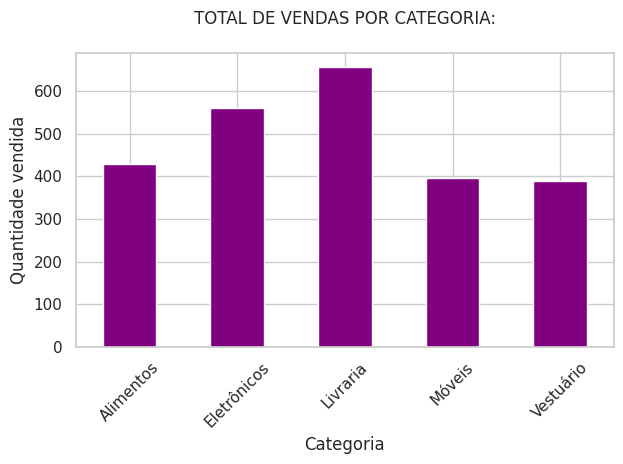

<Figure size 1000x500 with 0 Axes>

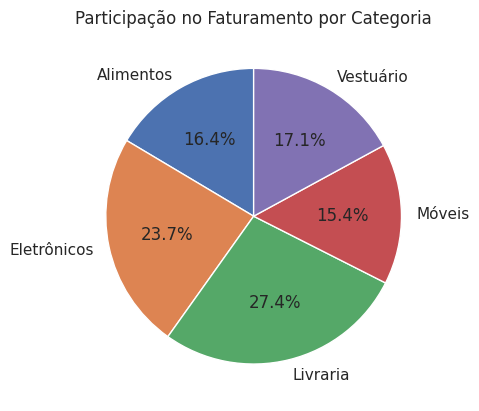

<Figure size 1000x500 with 0 Axes>

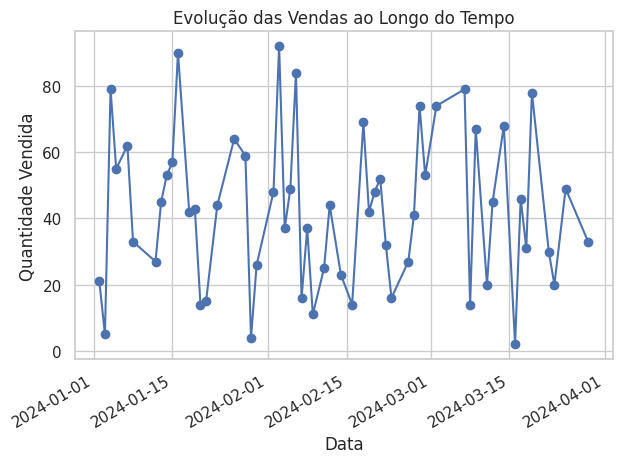

<Figure size 1000x500 with 0 Axes>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='whitegrid')


df = pd.read_csv('vendas_online.csv')

df.head()


#Total de vendas por categoria
vendas_categoria = df.groupby("Categoria")["Quantidade"].sum()
print(f"\nVENDAS POR CATEGORIAS:\n {vendas_categoria}, ")


#Produto mais vendido e menos vendido em quantidade
prod_vendido = df.groupby("Produto")["Quantidade"].sum()
mais_venda = prod_vendido.idxmax()
menos_venda = prod_vendido.idxmin()
print(f"\nPRODUTO MAIS VENDIDO:\n {mais_venda}")
print(f"\nPRODUTO MENOS VENDIDO:\n {menos_venda}")


#Receita total gerada pela loja
df["Receita"] = df["Quantidade"] * df["Preco_Unitario"]
receita_total = df["Receita"].sum()
print(f"\nRECEITA TOTAL GERADA PELA LOJA:\n {receita_total:.2f}")


# Média de preço dos produtos vendidos
mean_preco = (df["Quantidade"] * df["Preco_Unitario"]).sum()/ df["Quantidade"].sum()
print(f"\nMÉDIA DE PREÇO DOS PRODUTOS VENDIDOS:\n {mean_preco:.2f}")





#Um gráfico de barras mostrando o total de vendas por categoria
vendas_categoria.plot(kind='bar', color='purple')
plt.title('TOTAL DE VENDAS POR CATEGORIA:\n')
plt.xlabel('Categoria')
plt.ylabel('Quantidade vendida')
plt.xticks(rotation=45)
plt.tight_layout()
plt.figure(figsize=(10, 5))
plt.show()


#Um gráfico de pizza representando a participação de cada categoria no faturamento total
receita_categoria = df.groupby('Categoria')['Receita'].sum()

receita_categoria.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Participação no Faturamento por Categoria')
plt.ylabel('')
plt.figure(figsize=(10, 5))
plt.show()


# Um gráfico de linha mostrando a evolução das vendas ao longo do tempo (com base na coluna Data_Venda)
df['Data_Venda'] = pd.to_datetime(df['Data_Venda'])
vendas_tempo = df.groupby('Data_Venda')['Quantidade'].sum()

vendas_tempo.plot(kind='line', marker='o')
plt.title('Evolução das Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.tight_layout()
plt.figure(figsize=(10, 5))
plt.show()




